# Web Scrapping - IGLÚ SHOP

![image.png](https://images7.alphacoders.com/324/324002.jpg)

Empezamos importando las librerias necesarias.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import regex as re

In [3]:
url_esqui = "https://www.iglushop.es/esqui/esquis-hombre?product_list_limit=96"

In [4]:
html = requests.get(url_esqui)

In [5]:
html

<Response [200]>

In [6]:
soup = BeautifulSoup(html.content, "html.parser")

Saca una lista de productos de la URL

In [7]:
productos = soup.findAll("strong",{"class": "product name product-item-name"}) 

In [8]:
#Limpiamos y cogemos solo el texto; el nombre del producto. Vemos como se veria
productos[0].getText().strip() 

'Hagan Ride 83 + Pieles'

In [9]:
#Hacemos lo mismo para todos los productos
lista_productos = [a.getText().strip() for a in productos]  

Sacamos el nombre de la marca a una lista aparte, para tener mayor acceso en el DF:

In [10]:
#En este caso, la primera palabra era el nombre de la marca, por lo que lo sacamos en una nueva lista.
lista_marcas = [i.split()[0] for i in lista_productos]

Saca la lista de precios nuevos:

In [11]:
precios_nuevos = soup.findAll("span", {"class": "special-price"})

In [12]:
precios_nuevos[0].getText().strip()

'397,00\xa0€'

In [13]:
precios_nuevos[2].getText().strip()

'510,00\xa0€'

In [14]:
precios_nuevos[0]

<span class="special-price">
<span class="price-container price-final_price tax weee">
<span class="price-wrapper" data-price-amount="397" data-price-type="finalPrice" id="product-price-14499"><span class="price">397,00 €</span></span>
</span>
</span>

In [15]:
#Dejo limpio los precios, sin espacios \n ni \xa0, ni símbolo de €:

In [16]:
lista_precios_nuevos = [precio.getText().strip() for precio in precios_nuevos]

In [17]:
lista_precios_nuevos = [el.replace(u'€','') for el in lista_precios_nuevos]  #quito los € 
lista_precios_nuevos = [el.replace(',','.') for el in lista_precios_nuevos]  #cambio las , por .
lista_precios_nuevos = [el.replace('\xa0','') for el in lista_precios_nuevos] #quito los \xa0 

Y también sacamos la lista de los precios antiguos:

In [18]:
precios_antiguos = soup.findAll("span", {"class": "old-price sly-old-price"})

In [19]:
precios_antiguos[0].getText().strip()

'609,95\xa0€'

In [20]:
precios_antiguos[2].getText().strip()

'729,95\xa0€'

In [21]:
precios_antiguos[0]

<span class="old-price sly-old-price">
<span class="price-container price-final_price tax weee">
<span class="price-wrapper" data-price-amount="609.95" data-price-type="oldPrice" id="old-price-14499"><span class="price">609,95 €</span></span>
</span>
</span>

In [22]:
#Y vuelvo a limpiar los precios, sin espacios ni símbolo de €:

In [23]:
lista_precios_antiguos = [precio.getText().strip() for precio in precios_antiguos]

In [24]:
lista_precios_antiguos = [el.replace(u'€','') for el in lista_precios_antiguos]    
lista_precios_antiguos = [el.replace(',','.') for el in lista_precios_antiguos]   
lista_precios_antiguos = [el.replace('\xa0','') for el in lista_precios_antiguos]

Sacamos una lista de enlaces

In [25]:
enlaces = soup.select("a.product-item-link")

In [26]:
enlaces[0].get("class")

['product-item-link']

In [27]:
enlaces = soup.find_all("a", {"class":"product-item-link"})

In [28]:
links = []
for link in soup.find_all("a", {"class":"product-item-link"}):
    links.append(link.get('href'))
#me salen duplicados ya que hay más de una forma de acceder al enlace, por lo que
#elimino los duplicados
links_sin_duplicados = list(dict.fromkeys(links))

Creo un dataframe con las columnas: nombre, precio y enlace

In [29]:
print(len(lista_productos), len(lista_marcas), len(lista_precios_nuevos), len(lista_precios_antiguos), len(links_sin_duplicados))

85 85 84 84 85


Quitamos el primer esquí, pues todos los demás nos ponen el precio anterior y el nuevo, menos el primero:

In [30]:
lista_productos.pop(0)
lista_marcas.pop(0)
links_sin_duplicados.pop(0)

'https://www.iglushop.es/hagan-ride-83-pieles'

Y ya podemos construir el diccionario y posteriormente el DF con los otros 84 esquís de la página:

In [31]:
diccionario = {'Producto': lista_productos, 'Marca': lista_marcas, 'Precio_Antiguo': lista_precios_antiguos, 'Precio_Nuevo': lista_precios_nuevos, 'Enlace': links_sin_duplicados}

In [32]:
data = pd.DataFrame(diccionario)

In [33]:
data.head()

,Producto,Marca,Precio_Antiguo,Precio_Nuevo,Enlace
0,Dynafit Speedfit 84,Dynafit,609.95,397.00,https://www.iglushop.es/dynafit-speedfit-84
1,Hagan Core 84 + Pieles,Hagan,500.00,349.00,https://www.iglushop.es/hagan-core-84-pieles
2,Salomon MTN BC,Salomon,729.95,510.00,https://www.iglushop.es/salomon-mtn-bc
3,Salomon Stance 102,Salomon,699.95,319.95,https://www.iglushop.es/salomon-stance-102
4,Atomic Redster S7+F12 GW,Atomic,749.95,529.95,https://www.iglushop.es/atomic-redster-s7-f12-...


Para obtener info de un producto en concreto:

In [34]:
producto_concreto = requests.get("https://www.iglushop.es/salomon-s-race-rush-isl-n-x12-tl-408826")

In [35]:
soup_prod = BeautifulSoup(producto_concreto.content, "html.parser")

In [36]:
textaco = soup_prod.findAll("div", {"class":"product attribute description"})

In [37]:
textaco[0].getText().strip()

'Tanto si lo tuyo es lanzarte a toda velocidad por hielo duro o por pistas perfectas, este auténtico cohete de altas prestaciones para pista te transporte a la perfección en sus cantos para que puedas atacar tus giros más cortos. Desde carreras de fin de semana hasta trazar arcos cerrados sobre la nieve nuevecita de la mañana, este juego de esquís de alto rendimiento te ayuda a superar tus límites a la vez que consigues el giro perfecto que buscabas.'

Creo una columna con la descripción de cada producto:

In [38]:
def funcion_descrip(enlace):
    res = requests.get(enlace)
    soup = BeautifulSoup(res.content, "html.parser")
    descripcion = soup.findAll("div", {"class":"product attribute description"})
    return descripcion[0].getText().strip()

In [39]:
data['Descripción'] = data.Enlace.apply(funcion_descrip)

In [40]:
data.head()

,Producto,Marca,Precio_Antiguo,Precio_Nuevo,Enlace,Descripción
0,Dynafit Speedfit 84,Dynafit,609.95,397.00,https://www.iglushop.es/dynafit-speedfit-84,El DYNAFIT Speedfit 84 es un esquí sin complic...
1,Hagan Core 84 + Pieles,Hagan,500.00,349.00,https://www.iglushop.es/hagan-core-84-pieles,"Arranca toda la montaña con la serie CORE, con..."
2,Salomon MTN BC,Salomon,729.95,510.00,https://www.iglushop.es/salomon-mtn-bc,"Llega a la cima más rápido, carga el descenso ..."
3,Salomon Stance 102,Salomon,699.95,319.95,https://www.iglushop.es/salomon-stance-102,Esquís de freestyle Salomon Stance 102.\nCon u...
4,Atomic Redster S7+F12 GW,Atomic,749.95,529.95,https://www.iglushop.es/atomic-redster-s7-f12-...,Muchos esquiadores fuertes quieren un esquí pa...


Para dejar más limpia la descripción quito los
\n  y  \xa0 

In [41]:
data['Descripción'] = data['Descripción'].replace({'\n':''}, regex=True)
data['Descripción'] = data['Descripción'].replace({'\xa0':''}, regex=True)

In [42]:
data.loc[0]['Descripción']

'El DYNAFIT Speedfit 84 es un esquí sin complicaciones con características especialmente diseñadas para el esquí de travesía en pista. El modelo pesa 1.350 gramos de peso ligero (tamaño 176), lo que lo convierte en un compañero de fácil manejo para ascensos rápidos. Los flancos completos garantizan un buen agarre de los cantos en la pista, y el modelo permanece sin vibraciones y estable en condiciones de hielo. La construcción de balancines en la punta y la cola y la línea de cotas también se adaptan a cada tamaño de esquí, una característica única en el mercado del esquí de travesía. Esto mantiene la longitud efectiva del borde igualmente proporcional a cada tamaño, lo que le permite funcionar independientemente del tamaño. Para poder distribuir mejor la densidad del modelo, el esquí está equipado con una construcción DYNAFIT 3D. Esto reduce los materiales delante y detrás del área de unión para reducir el peso total del swing sin perder rendimiento cuesta abajo. La pala de carbono 3D

Podemos ver el número de esquís que vende cada marca:

<AxesSubplot:>

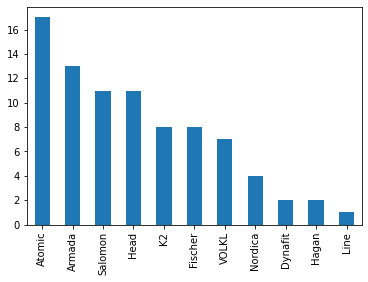

In [43]:
data.Marca.value_counts().plot(kind='bar')

Y para usar los datos de precio, cambiamos el tipo de dato a float:

In [44]:
#Del precio Nuevo:
data['Precio_Nuevo'].apply(type)

0     <class 'str'>
1     <class 'str'>
2     <class 'str'>
3     <class 'str'>
4     <class 'str'>
          ...      
79    <class 'str'>
80    <class 'str'>
81    <class 'str'>
82    <class 'str'>
83    <class 'str'>
Name: Precio_Nuevo, Length: 84, dtype: object

In [45]:
data['Precio_Nuevo'] = data['Precio_Nuevo'].astype(float)

In [46]:
data['Precio_Nuevo'].apply(type)

0     <class 'float'>
1     <class 'float'>
2     <class 'float'>
3     <class 'float'>
4     <class 'float'>
           ...       
79    <class 'float'>
80    <class 'float'>
81    <class 'float'>
82    <class 'float'>
83    <class 'float'>
Name: Precio_Nuevo, Length: 84, dtype: object

Para poder calcular otros datos con los precios nuevos:

In [47]:
data.Precio_Nuevo.mean()  #la media

470.91488095238094

In [48]:
data.Precio_Nuevo.max()

799.0

In [49]:
data.Precio_Nuevo.min()

152.0

<AxesSubplot:>

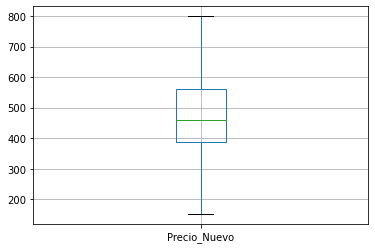

In [50]:
data.boxplot("Precio_Nuevo")